
# Прогнозирование диагностики 
##  заболеваний сердца с помощью 
### методов классификации. <h1>

### 1. Импорт необходимых библиотек <h3>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Загрузить набор данных и ввод содержимое таблицы

In [2]:
train = pd.read_csv('../input/heart.csv')
train.shape

(303, 14)

In [3]:
train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


1. Есть 303 строки и 14 столбцов.
2. Каждый атрибут имеет тип int, за исключением атрибута "oldpeak", который имеет тип float.
   Поскольку нет нулевого значения, мы можем легко использовать наши данные для дальнейшего анализа.


# Понимание данных с помощью визуализации

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dc32d1e80>,
      dtype=object)

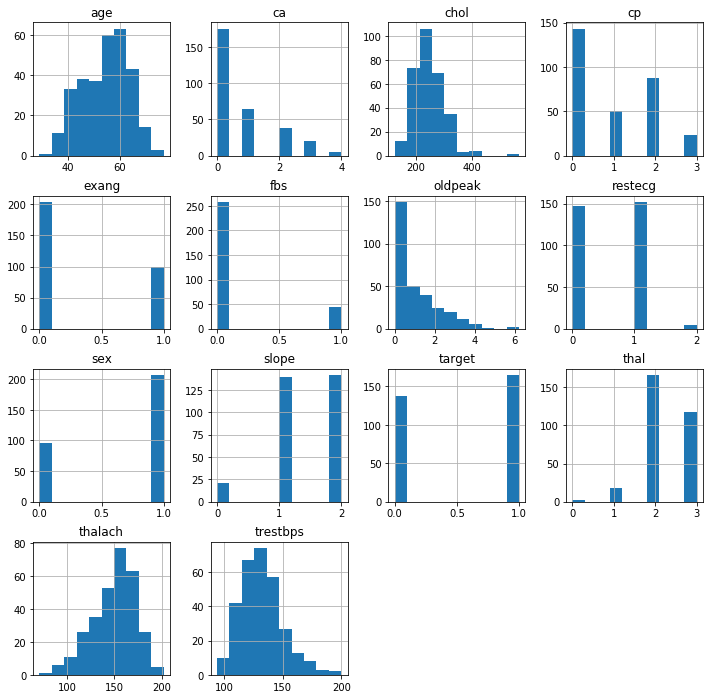

In [5]:
train.hist(figsize=(12,12))

### Давайте посмотрим, существует ли какая-либо связь между атрибутами


[Text(0, 0, 'age'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'cp'),
 Text(0, 0, 'trestbps'),
 Text(0, 0, 'chol'),
 Text(0, 0, 'fbs'),
 Text(0, 0, 'restecg'),
 Text(0, 0, 'thalach'),
 Text(0, 0, 'exang'),
 Text(0, 0, 'oldpeak'),
 Text(0, 0, 'slope'),
 Text(0, 0, 'ca'),
 Text(0, 0, 'thal'),
 Text(0, 0, 'target')]

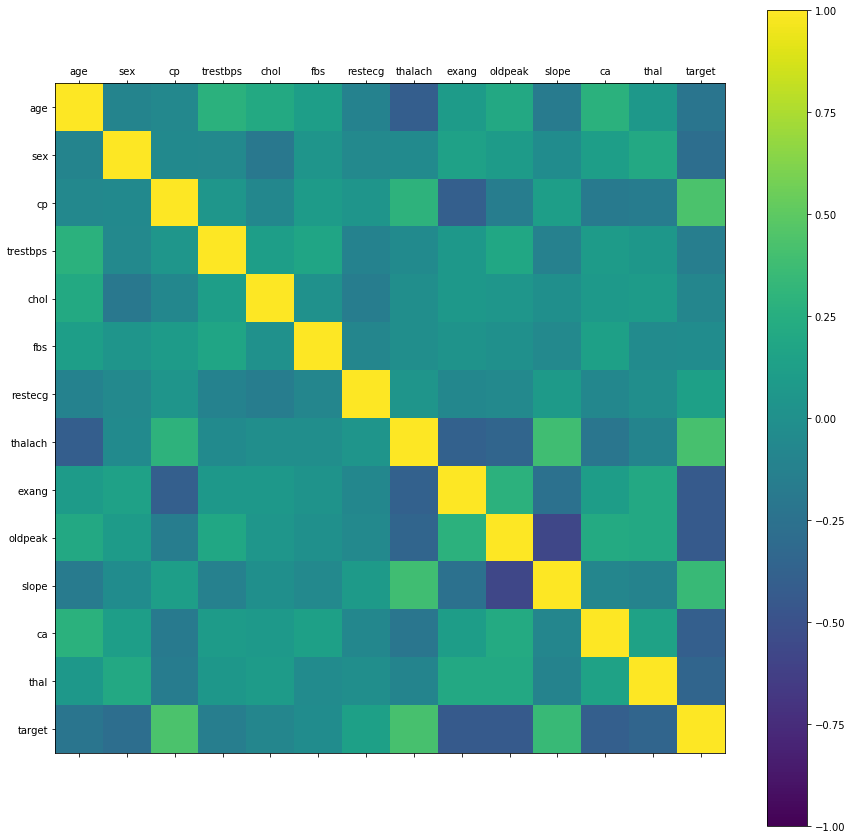

In [6]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
cax=ax.matshow(train.corr(),vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)

   Мы видим, что атрибуты, имеющие :

- Положительная связь
  chest pain = target
  thalcah = slope
  thalach = target
  slope = target
- Отрицательная связь
  oldpeak =slope
  cp = exang
  age = thalach

# Анализ данных

Давайте посмотрим, сколько людей страдают от болезни сердечного приступа

In [9]:
train.groupby('target').size()

target
0    138
1    165
dtype: int64

- люди, нет болезни сердечного приступа = 138
- люди, страдающие сердечным приступом = 165

In [10]:
p_risk = (len(train.loc[(train['target']==1) ])/len(train.loc[train['target']]))*100
print("Процентная доля лиц, подвергающихся риску заболеть : ", p_risk)

Процентная доля лиц, подвергающихся риску заболеть :  54.45544554455446


## Теперь давайте посмотрим, может ли пол человека повлиять

In [11]:
abc = pd.crosstab(train['sex'],train['target'])
abc

target,0,1
sex,,
0,24,72
1,114,93


- Количество мужчин без риска = 114
- Число женщин без риска = 24
- Количество мужчин в группе риска = 93
- Количество женщин в группе риска = 72

In [12]:
female_risk_percent = (len(train.loc[((train['sex']==0) & train['target']==1) ])/len(train.loc[train['sex']==0]))*100
male_risk_percent = (len(train.loc[((train['sex']==1) & train['target']==1) ])/len(train.loc[train['sex']==1]))*100
print('процент мужчин в группе риска : ',male_risk_percent)
print('процент женщин в группе риска : ',female_risk_percent)

процент мужчин в группе риска :  44.927536231884055
процент женщин в группе риска :  75.0



- Мы видим, что женщины подвергаются большему риску сердечного приступа, чем мужчины. 
- Давайте построим график между полом для более ясного представления.

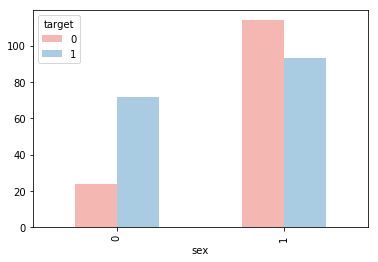

In [13]:
abc.plot(kind='bar', stacked=False, color=['#f5b7b1','#a9cce3'])

# Мы также должны увидеть, как разные возрасты могут иметь риск сердечного приступа

Гистограмма между возрастом и результатом(target).

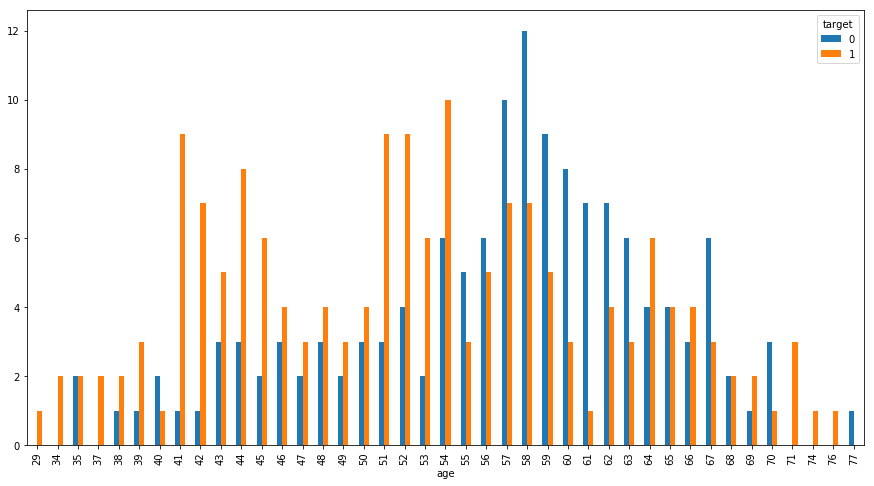

In [14]:
xyz = pd.crosstab(train.age,train.target)
xyz.plot(kind='bar',stacked=False,figsize=(15,8))

Мы видим, что люди в возрасте от 40 до 55 лет подвержены более высокому риску сердечного приступа.

# Давайте посмотрим, как грудная клетка связана с сердечным приступом.

In [15]:
pqr = pd.crosstab(train.cp,train.target)
pqr

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


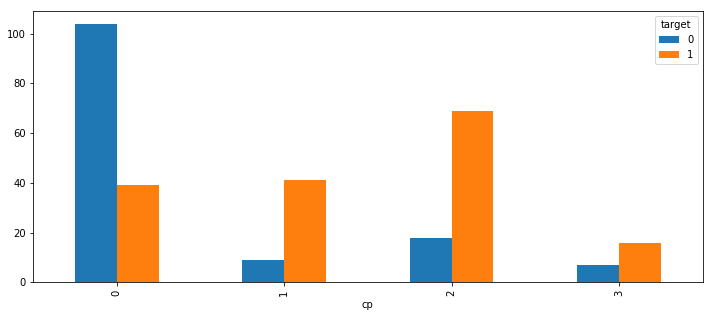

In [16]:
pqr.plot(kind='bar',figsize=(12,5))

Мы можем видеть ,что если у человека боль в груди 2 типа , то у него выше вероятность сердечного приступа, а если у человека боль в груди 0 типа, то у него очень маленький риск сердечного приступа.

# См. связь между thal и риском сердечного приступа

In [17]:
mno = pd.crosstab(train.thal,train.target)
mno

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


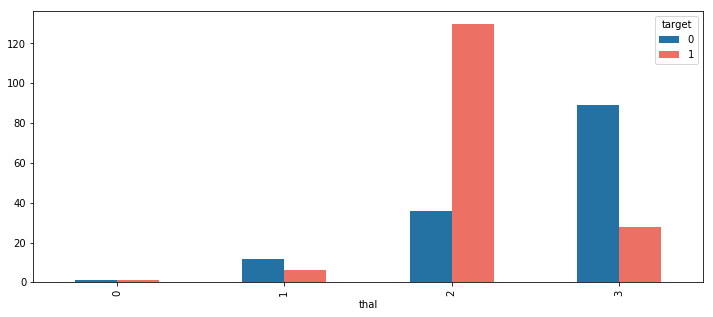

In [19]:
mno.plot(kind='bar', stacked=False, color=['#2471a3','#ec7063'],figsize=(12,5))

Мы видим, что thal type2 может значительно увеличить риск сердечного приступа.

Кроме того, мы можем анализировать данные ,но сначала давайте сделаем некоторый выбор функций, создадим модели и т. д. Для наших данных.

# Разделение данных на наборы train и test

In [20]:
array = train.values
X = array[:, 0:13]
y = array[:, 13]

seed = 7
tsize = 0.2

Мы выбрали первый столбец 13 в качестве объектов и 14-й столбец(target) в качестве метки.
Мы выбираем target в качестве метки, потому что :
target = 0 без риска сердечного приступа
цель = 1 риск сердечного приступа 
Теперь давайте разделим наши данные для дальнейшего обучения нашей модели.

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=seed)

Мы разделили наши данные:
Подготовка данных = 80%
Данные испытаний = 20%


Теперь давайте предварительно обработаем наши данные.

## Предварительная обработка данных для машинного обучения

In [22]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scale)
X_test_scale =scale.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scale)

Теперь давайте создадим различные модели для обучения наших данных
В приведенном ниже коде будем использовать различные алгоритмы классификации для обучения модели.

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [24]:
models=[]
models.append(('LR  :', LogisticRegression()))
models.append(('CART:', DecisionTreeClassifier()))

In [25]:
results = []
names = []
score = 'accuracy'
seed = 7
folds = 10
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.2,random_state=seed)


for name, model in models:
    kfold = KFold(n_splits=folds,random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, scoring=score)
    results.append(cv_results)
    msg ="%s %f (%f)" % (name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)

LR  : 84.295267 (0.634574)
CART: 78.106996 (3.773463)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value 

## Наконец, давайте спрогнозируем тестовые данные на нашей обученной модели

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [27]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(y_validation, predictions)*100)
print(classification_report(y_validation, predictions))

73.77049180327869
              precision    recall  f1-score   support

         0.0       0.82      0.60      0.69        30
         1.0       0.69      0.87      0.77        31

   micro avg       0.74      0.74      0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Мы получили общую точность 73,7% для нашей натренированной модели.

In [28]:
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(y_validation, predictions)*100)
print(classification_report(y_validation, predictions))

72.1311475409836
              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67        30
         1.0       0.68      0.87      0.76        31

   micro avg       0.72      0.72      0.72        61
   macro avg       0.74      0.72      0.71        61
weighted avg       0.74      0.72      0.71        61

